### Testing logistic equation

$N' = rN(1-N)$

with Julia DifferentialEquations.jl, and then with Julia Modelling Toolkit

In [9]:
using Plots
using LinearAlgebra
using LaTeXStrings
using DifferentialEquations
using RecursiveArrayTools
using CSV
using DataFrames

In [10]:
N_init = 0.5
r = 0.1
N0 = ArrayPartition(N_init)
p=[r]

1-element Vector{Float64}:
 0.1

In [34]:
function logistic_2!(dN, N, p, t)
    P = N.x[1]
    r = p[1]
    dP = r*P*(1-P)
    dN.x[1] .= dP
end

function logistic_func(dN, N, r, t)
    dN .= r.*N.*(1 .- N)
end

logistic_func (generic function with 1 method)

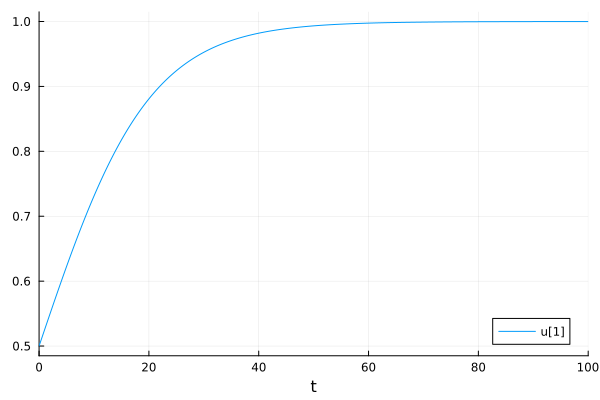

In [40]:
N_init = 0.5
N0 = ArrayPartition([N_init], [0]) # testing if it handles array partition
r = 0.1
p=[r]
t_end = 100.0

prob = ODEProblem(logistic_func, [N_init], (0.0, t_end), r)
sol = solve(prob, Tsit5(), saveat=0.05)

plot(sol, idxs=(0,1))

In [41]:
sol.t

2001-element Vector{Float64}:
   0.0
   0.05
   0.1
   0.15
   0.2
   0.25
   0.3
   0.35
   0.4
   0.45
   ⋮
  99.6
  99.65
  99.7
  99.75
  99.8
  99.85
  99.9
  99.95
 100.0